# 🔊 Working with Audio in Python

<img src="https://miro.medium.com/max/1100/1*Zx9QAMPzxhama9O4q9xWXg.jpeg" width="600"/>

This notebook is intended to be an introduction for anyone interested in using python to interperate audio data.

Please watch the youtube video that discusses the contents of this notebook if you want to learn more!
- [Video Link](https://www.youtube.com/watch?v=ZqpSb5p1xQo)
- [Youtube Channel](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw)

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])




# Terms to know for Audio in Digital Form:

## Frequency (Hz)
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

<img src="https://uploads-cdn.omnicalculator.com/images/britannica-wave-frequency.jpg" width="400"/>

## Intensity (db / power)
- Intensity describes the amplitude (height) of the wave.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

## Sample Rate
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.

<img src="https://www.headphonesty.com/wp-content/uploads/2019/07/Sample-Rate-Bit-Depth-and-Bit-Rate.jpeg" width="400"/>


# Reading in Audio Files
There are many types of audio files: `mp3`, `wav`, `m4a`, `flac`, `ogg`

In [ ]:
audio_files = glob("sampleaudio.wav")

In [ ]:
# Play audio file
ipd.Audio(audio_files[0])

y: [-0.03771973 -0.02212524  0.0246582   0.01687622  0.0246582   0.00906372
  0.00125122  0.00125122  0.01687622  0.00906372]
shape y: (26843,)
sr: 1500


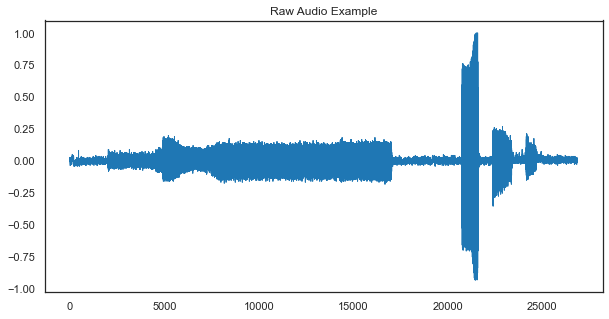

(256, 53)
[[-74.89500427246094, -72.90739440917969, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -76.76545715332031, -76.15186309814453, -79.54927062988281, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -74.44779968261719, -75.3440170288086, -80.0, -80.0, -79.25347900390625, -80.0, -80.0, -72.96966552734375, -73.83299255371094, -80.0, -80.0, -80.0], [-74.15731811523438, -78.34577941894531, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0], [-72.73590087890625, -76.24787902832031, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0

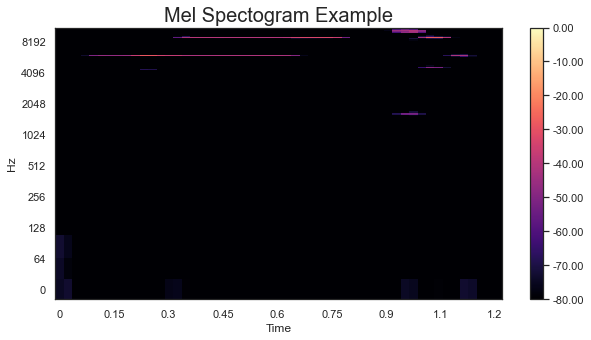

In [9]:
# y, sr = librosa.load("hoot-46198.mp3", sr=22050)
y, sr = librosa.load("400Hz-600Hz-800Hz.wav", sr=1500)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
# f = open("hoot-46198.txt", "w")
# f.write(y)
# f.close()
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
# y = y.astype(float)
# # print(f'shape y: {y.shape}')
# y = y[5000:10000].tolist()
# print(y[0])
# y = ','.join('%.4f' %x for x in y)

# # f = open("hoot-46198_1.txt", "w")
# # f.write(y)
# # f.close()

S = librosa.feature.melspectrogram(y=y,
                                  sr=1500,
                                  n_mels=128 * 2,)


S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
print(S_db_mel.shape)
spectrumList = S_db_mel.tolist()
print(spectrumList[:3])
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()
import sounddevice as sd
step = 1000
sd.play(y, step,blocking=True)

{'output': [0, 1, 1, 1, 1, 1], 'Calls': 1}


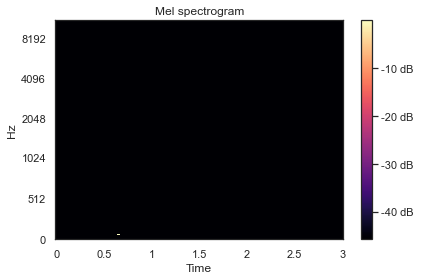

In [3]:
import io

import IPython.display as ipd
import librosa
import librosa.display
import pymongo
import numpy as np
import matplotlib.pyplot as plt


with open('mongodbKey', 'r') as file:
    MONGO_URL = file.read()
dbClient = pymongo.MongoClient(MONGO_URL)
DATABASE_NAME = "mydatabase"
COLLECTION_NAME = "AudiosTest"
def binaryData2numpy(input):
    out, sr = librosa.load(io.BytesIO(input), sr=None)
    return out
def queryAudio(id):
    mycol = dbClient[DATABASE_NAME][COLLECTION_NAME]
    myquery = { "ID": id}
    mydoc = mycol.find_one(myquery)
    return mydoc
def playNumpy(numpy_array):
    import sounddevice as sd
    sd.play(numpy_array, sr)
    sd.wait()



def insertAudio(id, wavfile):
    mycol = dbClient[DATABASE_NAME][COLLECTION_NAME]

    
    f = open(wavfile, "rb")
    y= f.read()
    myInsert = { "ID": id, "fileBytes" : y}

    mycol.insert_one(myInsert)

def generateMelSpecBinaryImage(np_array):
    S = librosa.feature.melspectrogram(y=np_array,
                                  sr=22050,
                                  n_mels=128 * 2,)


    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    # fig= plt.figure()
    # # Plot the mel spectogram
    # img = librosa.display.specshow(S_db_mel,
    #                             x_axis='time',
    #                             y_axis='log',
    #                             ax=ax)
    # ax.set_title('Mel Spectogram Example', fontsize=20)
    # fig.colorbar(img, ax=ax, format=f'%0.2f')
    # plt.show()


    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.power_to_db(S_db_mel, ref=np.max), y_axis='mel', x_axis='time', sr=sr, ax=ax)
    fig.colorbar(img, format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()
    #     fig = plt.figure(figsize=(10, 4))
    # librosa.display.specshow(librosa.power_to_db(S_db_mel, ref=np.max), y_axis='mel', x_axis='time', sr=sr, ax=plt.gca())
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Mel spectrogram')
    # plt.tight_layout()
    # plt.show()

def loadMelSpecBinary2Image():
    return
def updateAudio(id, newVal):
    mycol = dbClient[DATABASE_NAME][COLLECTION_NAME]


    filter = { 'ID': id }
 
    # Values to be updated.
    newvalues = { "$set": newVal }
    
    # Using update_one() method for single
    # updation.
    mycol.update_one(filter, newvalues)

def listAudio():
    mycol = dbClient[DATABASE_NAME][COLLECTION_NAME]
    return mycol.distinct("ID")
def generateID():
    from datetime import datetime

    timestamp = datetime.now().strftime("%Y-%m-%d_%H%M%S")
    print(timestamp)
    return timestamp

size = 10000
sr = 22050
ID = "test4"
# generateID()
# print(listAudio())


### queryTestAudio
doc = queryAudio(ID)
print(doc['MLData'])
audioNumpy = binaryData2numpy(doc['fileBytes'])

# playNumpy(audioNumpy)
generateMelSpecBinaryImage(audioNumpy)

# ##  updateAudio
# newVal = {"MLData":{'output': [0, 1, 1, 1, 1, 1], 'Calls': 1}}
# updateAudio(ID, newVal)


    ### InsertAudio via wav file
    # insertAudio(ID, "sampleaudio.wav")



In [ ]:
y,sr = librosa.load("training/owl/owl-hooting-48028.mp3",sr=22050)
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
ipd.Audio("training/owl/owl-hooting-48028.mp3")

In [ ]:
y,sr = librosa.load("training/1owl/owl-hooting-48028.mp3",sr=22050)
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
ipd.Audio("training/1owl/owl-hooting-48028.mp3")
### this code trims and front and back and then puts it into chunks
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()


def cut_song(song, step = 10000):
  song_pieces = []
  
  # for i in range(start, end, step):
  #   song_pieces.append(song[i:i+step])
  y_split = librosa.effects.split(song, top_db=20)
  for i in y_split:
    segment = song[i[0]:i[1]]
    for j in range(0, (len(segment)-int(step/2)), step):

      song_pieces.append(segment[j:j+step])
  return song_pieces
  
# y_split = librosa.effects.split(y, top_db=20)
# print("ysplit", y_split)

# for i in y_split:
#   pd.Series(i).plot(figsize=(10, 5),
#                     lw=1,
#                     title='Raw Audio Trimmed Example',
#                   color=color_pal[1])
yCut = cut_song(y_trimmed, 10000)


for i in yCut:
  pd.Series(i).plot(figsize=(10, 5),
                    lw=1,
                    title='Raw Audio Trimmed1 Example',
                  color=color_pal[1])

  plt.show()
S = librosa.feature.melspectrogram(y=yCut[0],
                                  sr=sr,
                                  n_mels=128 * 2,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()


In [ ]:

y,sr = librosa.load("training/seagull/seagulls-5863.mp3",sr=22050)
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
ipd.Audio("training/owl/owl-hooting-48028.mp3")### this code trims and front and back and then puts it into chunks
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()


def cut_song(song, step = 10000):
  song_pieces = []
  
  # for i in range(start, end, step):
  #   song_pieces.append(song[i:i+step])
  y_split = librosa.effects.split(song, top_db=20)
  for i in y_split:
    segment = song[i[0]:i[1]]
    for j in range(0, (len(segment)-int(step/2)), step):

      song_pieces.append(segment[j:j+step])
  return song_pieces
  
# y_split = librosa.effects.split(y, top_db=20)
# print("ysplit", y_split)

# for i in y_split:
#   pd.Series(i).plot(figsize=(10, 5),
#                     lw=1,
#                     title='Raw Audio Trimmed Example',
#                   color=color_pal[1])
yCut = cut_song(y_trimmed, 10000)


for i in yCut:
  pd.Series(i).plot(figsize=(10, 5),
                    lw=1,
                    title='Raw Audio Trimmed1 Example',
                  color=color_pal[1])

  plt.show()


from a file list, convert list to nnumpy, and then play audio

(18688,)
[-1.04923826 -0.67818775 -1.42028878  0.06391329 -0.67818775 -1.7913393
  0.06391329  1.54811537  1.54811537 -0.67818775]
(256, 37)
[[-1.4011954154316442, 0.0, -17.12380080398809, -22.954026547437138, -15.772862402771338, -18.596751384153535, -16.649455191091477, -12.71971258620431, -10.817939983496913, -13.11783085557397, -20.027824958115858, -22.17408156879351, -20.937253025156963, -37.6079792529321, -51.38202182751963, -14.95573044606256, -1.8676963078068098, -11.533671919788148, -80.0, -24.787903124007272, -24.143606144570626, -47.99543466834746, -42.8829946959608, -62.246877187248515, -78.00766932917725, -62.84909853737433, -49.244810957135115, -47.67242318491677, -55.42426812343037, -52.72321859754844, -45.19306041555456, -52.70456013643917, -44.3178929255008, -42.64901372525121, -44.39468674602778, -52.422750539466975, -48.33507995562226], [-10.533322226297798, -12.187933335403542, -25.312743314068456, -22.249293481438855, -40.03350301581175, -52.26069540026348, -71.044

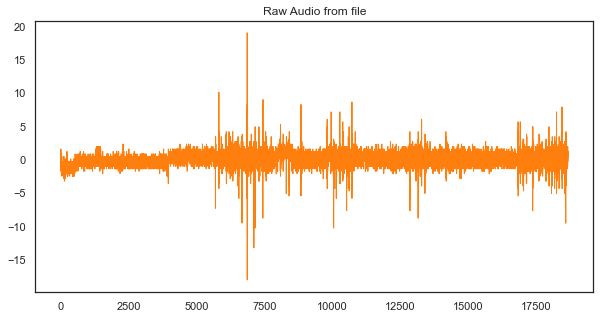

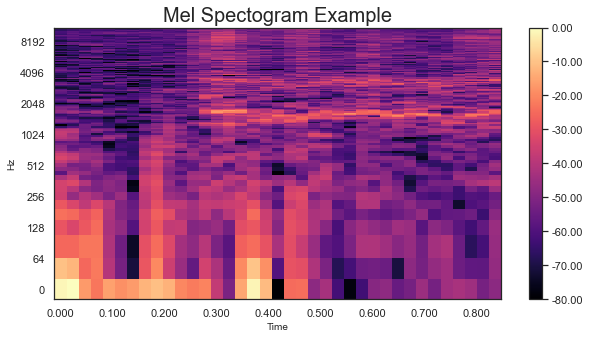

In [21]:
import numpy as np
import pandas as pd

# File_data = np.loadtxt("SAASFreqTest2Values.txt", dtype=float)
f = open("dataSample330.txt", "r")
# f = open("SAASFreqTest2Values.txt", "r")
input = f.readlines()
import ast

audio = []
for i in input:
    l = ast.literal_eval(i)
    audio.append(l)
audio = np.array(audio).flatten().astype(np.int32)
print(audio.shape)
# audio = np.array([ np.float32((s>>2)/(32768.0)) for s in audio])

audio = (audio - np.mean(audio)) / np.std(audio)

audio = audio
print(audio[:10])
import sounddevice as sd
step = 1000
sd.play(audio, step,blocking=False)
xticks = np.linspace(0, len(audio), int(len(audio)/step))

pd.Series(audio).plot(figsize=(10, 5),
                    lw=1,
                    title='Raw Audio from file',
                  color=color_pal[1])

S = librosa.feature.melspectrogram(y=audio,
                                  sr=22050,
                                  n_mels=128 * 2,)


S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
print(S_db_mel.shape)
spectrumList = S_db_mel.tolist()
print(spectrumList[:3])
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()


In [13]:
import io
f = open("400Hz-600Hz-800Hz.wav", "rb")
y= f.read()
out, sr = librosa.load(io.BytesIO(y), sr=None)
import sounddevice as sd
sd.play(out, sr)
sd.wait()
print(sr)

1500


In [ ]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()


def cut_song(song, step = 10000):
  start = 0
  end = len(song)
  song_pieces = []
  for i in range(start, end, step):
    song_pieces.append(song[i:i+step])
  return song_pieces


yCut = cut_song(y_trimmed, 20000)


for i in yCut:
  pd.Series(i).plot(figsize=(10, 5),
                    lw=1,
                    title='Raw Audio Trimmed1 Example',
                  color=color_pal[1])

  plt.show()


In [ ]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

# Spectogram

In [ ]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

In [ ]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram

In [ ]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

In [ ]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
pre_emphasis = 0.97
emphasized_audio = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

pd.Series(emphasized_audio).plot(figsize=(10, 5),
                  lw=1,
                  title='Emp Audio Example',
                 color=color_pal[0])
plt.show()
normalized_audio = (y - np.mean(y)) / np.std(y)
pd.Series(normalized_audio).plot(figsize=(10, 5),
                  lw=1,
                  title='Norm Audio Example',
                 color=color_pal[0])

# y_resampled = librosa.resample(y, sr, 10)

# pd.Series(y_resampled).plot(figsize=(10, 5),
#                   lw=1,
#                   title='resample Audio Example',
#                  color=color_pal[0])

